<a href="https://colab.research.google.com/github/jiyoungsong-pr/prac_class/blob/main/%EC%A7%80%EC%98%81_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Library Imports
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error


#######통계 라이브러리##########
!pip install statsmodels
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
train=pd.read_csv('/content/new_train.csv')

In [11]:
import pandas as pd
test=pd.read_csv('/content/new_test.csv')

In [12]:
import pandas as pd
submission =pd.read_csv('/content/sample_submission.csv')

In [14]:
train=pd.read_csv('new_train.csv')
test=pd.read_csv('new_test.csv')
train['nelec_cool'].fillna(0, inplace=True)
train['solar'].fillna(0, inplace=True)
submission=pd.read_csv('sample_submission.csv')

In [15]:
#train.shape 122400 X 10
#60개의 건물 X 85일 24시간 =122400
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool,solar,hour,day,month,date,weekday,weekend,DI,DI_70,DI_75,DI_80,DI_83,DI_86,SL,CDH,TW,corona
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,1,6,2020-06-01,0,0,63.43008,0,0,0,0,0,0.000000,-8.4,18.973374,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,6,2020-06-01,0,0,63.56993,0,0,0,0,0,0.000000,-16.7,18.960338,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,1,6,2020-06-01,0,0,63.22775,0,0,0,0,0,0.000000,-25.2,18.658598,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,1,6,2020-06-01,0,0,62.54339,0,0,0,0,0,0.000000,-34.1,18.218957,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,1,6,2020-06-01,0,0,62.39760,0,0,0,0,0,0.000000,-43.1,18.081523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,24,8,2020-08-24,0,0,77.80896,0,1,0,0,0,2.367647,30.8,30.000891,2
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,24,8,2020-08-24,0,0,77.44917,0,1,0,0,0,0.000000,32.3,29.525251,2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,24,8,2020-08-24,0,0,77.44917,0,1,0,0,0,0.000000,32.5,29.487603,2
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,24,8,2020-08-24,0,0,77.52246,0,1,0,0,0,0.000000,31.3,29.276183,2


In [16]:
#test.shape 10080 X 9
#60개의 건물 X 7일 24시간 =10080
test

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool,solar,hour,day,month,date,weekday,weekend,DI,DI_70,DI_75,DI_80,DI_83,DI_86,SL,CDH,TW,corona
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0,0,0,25,8,2020-08-25,1,0,78.602280,0,1,0,0,0,0.000000,1.800000,30.027122,2
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0,0,1,25,8,2020-08-25,1,0,78.519273,0,1,0,0,0,0.000000,3.433333,29.859547,2
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0,0,2,25,8,2020-08-25,1,0,78.431867,0,1,0,0,0,0.000000,4.900000,29.694705,2
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0,0,3,25,8,2020-08-25,1,0,78.340060,0,1,0,0,0,0.000000,6.200000,29.533017,2
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0,0,4,25,8,2020-08-25,1,0,77.912697,0,1,0,0,0,0.000000,7.100000,29.116617,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,1,1,19,31,8,2020-08-31,0,0,78.764020,0,1,0,0,0,2.882155,22.400000,30.894924,2
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,1,1,20,31,8,2020-08-31,0,0,78.364280,0,1,0,0,0,1.525705,25.400000,30.486546,2
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1,1,21,31,8,2020-08-31,0,0,77.957280,0,1,0,0,0,0.000000,27.700000,30.074281,2
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1,1,22,31,8,2020-08-31,0,0,77.957280,0,1,0,0,0,0.000000,29.300000,30.074281,2


# **모델링**

In [46]:
# 1번 군집 
list1 = [1, 31, 30, 60, 3, 5, 24,32, 33, 15]
cl1 = train.drop([ 'date'], axis = 1)
cl1 = cl1[cl1['num'].isin(list1)==True]
#cl1 = train[train['num'].isin(list1)==True]
print(train.shape, cl1.shape)
print('1번 군집은 전체 데이터의 {0:.2f}'.format(cl1.shape[0]/train.shape[0] *100 )+' %를 차지함')

(122400, 26) (20400, 25)
1번 군집은 전체 데이터의 16.67 %를 차지함


In [47]:
# 2번 군집 
list1 = [2, 6, 7, 8, 13, 14, 16, 17, 18, 22, 23, 25, 26, 27, 37, 46, 47, 48, 52, 53, 54, 55, 56, 57 ,35, 38, 43, 44, 39, 45]
cl2 = train.drop(['date'], axis = 1)
cl2 = cl2[cl2['num'].isin(list1)==True]
#cl2 = train[train['num'].isin(list1)==True]
print(train.shape, cl2.shape)
print('2번 군집은 전체 데이터의 {0:.2f}'.format(cl2.shape[0]/train.shape[0] *100 )+' %를 차지함')

(122400, 26) (61200, 25)
2번 군집은 전체 데이터의 50.00 %를 차지함


In [48]:
# 3번 군집
l2 = [19,20,21,29,36,40,41,49,50,58,59]
cl3 = train.drop([ 'date'], axis = 1)
cl3 = cl3[cl3['num'].isin(l2)==True]
#cl3 = train[train['num'].isin(l2)==True]
print(train.shape, cl3.shape)
print('3번 군집은 전체 데이터의 {0:.2f}'.format(cl3.shape[0]/train.shape[0] *100 )+' %를 차지함')

(122400, 26) (22440, 25)
3번 군집은 전체 데이터의 18.33 %를 차지함


In [49]:
# 4번 군집
l3 = [14,9,10,11,12,30,42]
cl4 = train.drop([ 'date'], axis = 1)
cl4 = cl4[cl4['num'].isin(l3)==True]
#cl4 = train[train['num'].isin(l3)==True]
print(train.shape, cl4.shape)
print('4번 군집은 전체 데이터의 {0:.2f}'.format(cl4.shape[0]/train.shape[0] *100 )+' %를 차지함')

(122400, 26) (14280, 25)
4번 군집은 전체 데이터의 11.67 %를 차지함


In [51]:
# 5번 군집
l4 = [5,21,28,32,51, 34]
cl5 = train.drop(['date'], axis = 1)
cl5 = cl5[cl5['num'].isin(l4)==True]
#cl5 = train[train['num'].isin(l4)==True]
print(train.shape, cl5.shape)
print('5번 군집은 전체 데이터의 {0:.2f}'.format(cl5.shape[0]/train.shape[0] *100 )+' %를 차지함')

(122400, 26) (12240, 25)
5번 군집은 전체 데이터의 10.00 %를 차지함


In [52]:
# 군집 5개 완성!
cl1.reset_index(inplace=True, drop=True)
cl2.reset_index(inplace=True, drop=True)
cl3.reset_index(inplace=True, drop=True)
cl4.reset_index(inplace=True, drop=True)
cl5.reset_index(inplace=True, drop=True)

In [53]:
# 군집별 데이터 수가 적어서 k-fold 하는 걸로 
print(cl1.shape[0],cl2.shape[0],cl3.shape[0],cl4.shape[0],cl5.shape[0])

20400 61200 22440 14280 12240


In [54]:
train.head()

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool,solar,hour,day,month,date,weekday,weekend,DI,DI_70,DI_75,DI_80,DI_83,DI_86,SL,CDH,TW,corona
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,1,6,2020-06-01,0,0,63.43008,0,0,0,0,0,0.0,-8.4,18.973374,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,6,2020-06-01,0,0,63.56993,0,0,0,0,0,0.0,-16.7,18.960338,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,1,6,2020-06-01,0,0,63.22775,0,0,0,0,0,0.0,-25.2,18.658598,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,1,6,2020-06-01,0,0,62.54339,0,0,0,0,0,0.0,-34.1,18.218957,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,1,6,2020-06-01,0,0,62.39760,0,0,0,0,0,0.0,-43.1,18.081523,1


In [55]:
# 독립변수(X_df)/ 종속변수(y) 나누기
X_df = train.drop(['target', 'date'], axis=1)
y = train['target']

In [56]:
X_df.columns

Index(['num', 'date_time', 'temperature', 'windspeed', 'humidity',
       'precipitation', 'insolation', 'nelec_cool', 'solar', 'hour', 'day',
       'month', 'weekday', 'weekend', 'DI', 'DI_70', 'DI_75', 'DI_80', 'DI_83',
       'DI_86', 'SL', 'CDH', 'TW', 'corona'],
      dtype='object')

In [57]:
X_df.drop(['DI_80', 'DI_83', 'DI_86', 'month', 'weekday'], axis=1, inplace=True)
X_df.head()

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool,solar,hour,day,weekend,DI,DI_70,DI_75,SL,CDH,TW,corona
0,1,2020-06-01 00:00:00,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,1,0,63.43008,0,0,0.0,-8.4,18.973374,1
1,1,2020-06-01 01:00:00,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,0,63.56993,0,0,0.0,-16.7,18.960338,1
2,1,2020-06-01 02:00:00,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,1,0,63.22775,0,0,0.0,-25.2,18.658598,1
3,1,2020-06-01 03:00:00,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,1,0,62.54339,0,0,0.0,-34.1,18.218957,1
4,1,2020-06-01 04:00:00,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,1,0,62.39760,0,0,0.0,-43.1,18.081523,1


In [58]:
X_df_con = X_df.drop(['num', 'weekend','nelec_cool', 'solar', 'DI_70', 'DI_75','corona'], axis=1)
X_df_con.head()

,date_time,temperature,windspeed,humidity,precipitation,insolation,hour,day,DI,SL,CDH,TW
0,2020-06-01 00:00:00,17.6,2.5,92.0,0.8,0.0,0,1,63.43008,0.0,-8.4,18.973374
1,2020-06-01 01:00:00,17.7,2.9,91.0,0.3,0.0,1,1,63.56993,0.0,-16.7,18.960338
2,2020-06-01 02:00:00,17.5,3.2,91.0,0.0,0.0,2,1,63.22775,0.0,-25.2,18.658598
3,2020-06-01 03:00:00,17.1,3.2,91.0,0.0,0.0,3,1,62.54339,0.0,-34.1,18.218957
4,2020-06-01 04:00:00,17.0,3.3,92.0,0.0,0.0,4,1,62.39760,0.0,-43.1,18.081523


In [30]:
#위의 애들에 대해서만 표준화 적용
train_mean = np.mean(X_df_con)
train_std = np.std(X_df_con)
X_df_scaled = (X_df_con - train_mean)/train_std
X_df_scaled.reset_index(inplace=True)
X_df_scaled.head()

,index,temperature,windspeed,humidity,precipitation,insolation,hour,day,DI,SL,CDH,TW
0,0,-1.951858,0.230021,0.761967,0.108596,-0.576315,-1.661325,-1.638058,-2.099273,-0.303629,0.371478,-2.085954
1,1,-1.922514,0.494140,0.697558,-0.081916,-0.576315,-1.516862,-1.638058,-2.070006,-0.303629,0.128157,-2.089634
2,2,-1.981202,0.692229,0.697558,-0.196224,-0.576315,-1.372399,-1.638058,-2.141617,-0.303629,-0.121027,-2.174818
3,3,-2.098577,0.692229,0.697558,-0.196224,-0.576315,-1.227936,-1.638058,-2.284839,-0.303629,-0.381937,-2.298934
4,4,-2.127920,0.758259,0.761967,-0.196224,-0.576315,-1.083473,-1.638058,-2.315350,-0.303629,-0.645779,-2.337733


In [31]:
X_df_cat = X_df[['num', 'weekend','nelec_cool', 'solar', 'DI_70', 'DI_75', 'corona']]
X_df_cat.reset_index(inplace=True)

In [32]:
y = pd.DataFrame(y)
y.reset_index(inplace=True)

In [33]:
X_df_final = X_df_scaled.merge(X_df_cat, on='index')
X_df_final = X_df_final.merge(y, on='index')
X_df_final.drop('index', axis=1,  inplace=True)

In [34]:
X_df_final.head()

,temperature,windspeed,humidity,precipitation,insolation,hour,day,DI,SL,CDH,TW,num,weekend,nelec_cool,solar,DI_70,DI_75,corona,target
0,-1.951858,0.230021,0.761967,0.108596,-0.576315,-1.661325,-1.638058,-2.099273,-0.303629,0.371478,-2.085954,1,0,0.0,0.0,0,0,1,8179.056
1,-1.922514,0.494140,0.697558,-0.081916,-0.576315,-1.516862,-1.638058,-2.070006,-0.303629,0.128157,-2.089634,1,0,0.0,0.0,0,0,1,8135.640
2,-1.981202,0.692229,0.697558,-0.196224,-0.576315,-1.372399,-1.638058,-2.141617,-0.303629,-0.121027,-2.174818,1,0,0.0,0.0,0,0,1,8107.128
3,-2.098577,0.692229,0.697558,-0.196224,-0.576315,-1.227936,-1.638058,-2.284839,-0.303629,-0.381937,-2.298934,1,0,0.0,0.0,0,0,1,8048.808
4,-2.127920,0.758259,0.761967,-0.196224,-0.576315,-1.083473,-1.638058,-2.315350,-0.303629,-0.645779,-2.337733,1,0,0.0,0.0,0,0,1,8043.624


In [35]:
# 1번 군집 
list1 = [1, 31, 30, 60, 3, 5, 24,32, 33, 15]
cl1 = X_df_final[X_df_final['num'].isin(list1)==True]
print(X_df_final.shape, cl1.shape)

# 2번 군집
list1 = [2, 6, 7, 8, 13, 14, 16, 17, 18, 22, 23, 25, 26, 27, 37, 46, 47, 48, 52, 53, 54, 55, 56, 57 ,35, 38, 43, 44, 39, 45]
cl2 = X_df_final[X_df_final['num'].isin(list1)==True]
print(X_df_final.shape, cl2.shape)

# 3번 군집
l2 = [19,20,21,29,36,40,41,49,50,58,59]
cl3 = X_df_final[X_df_final['num'].isin(l2)==True]
print(X_df_final.shape, cl3.shape)

# 4번 군집
l3 = [14,9,10,11,12,30,42]
cl4 = X_df_final[X_df_final['num'].isin(l3)==True]
print(X_df_final.shape, cl4.shape)

# 5번 군집
l4 = [5,21,28,32,51, 34]
cl5 = X_df_final[X_df_final['num'].isin(l4)==True]
print(X_df_final.shape, cl5.shape)

(122400, 19) (20400, 19)
(122400, 19) (61200, 19)
(122400, 19) (22440, 19)
(122400, 19) (14280, 19)
(122400, 19) (12240, 19)


In [59]:
#2d의 데이터프레임을 건물별 정보를 반영한 3d 데이터로 변환
def df2d_to_array3d(df_2d):
    feature_size=df_2d.iloc[:,2:].shape[1]
    time_size=len(df_2d['date_time'].value_counts())
    sample_size=len(df_2d.num.value_counts())
    return df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])

# **cluster1**

In [126]:
train_x_array=df2d_to_array3d(cl1)
test_x_array=df2d_to_array3d(cl1)

In [127]:
print(train_x_array.shape)
print(test_x_array.shape)

(10, 2040, 23)
(10, 2040, 23)


In [128]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

In [129]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()

In [130]:
preds=fit.predict(1, 2040)

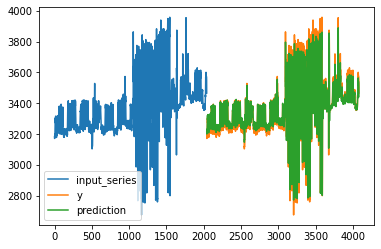

In [131]:
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(2040, 2040+2040), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(2040, 2040+2040), preds, label='prediction')
plt.legend()

# **cluster 2**

In [132]:
train_x_array=df2d_to_array3d(cl2)
test_x_array=df2d_to_array3d(cl2)

In [133]:
print(train_x_array.shape)
print(test_x_array.shape)

(30, 2040, 23)
(30, 2040, 23)


In [134]:
preds=fit.predict(1, 2040)

In [135]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()

In [155]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

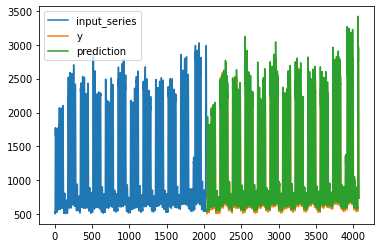

In [123]:
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(2040, 2040+2040), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(2040, 2040+2040), preds, label='prediction')
plt.legend()

# **cluster3**

In [176]:
train_x_array=df2d_to_array3d(cl3)
test_x_array=df2d_to_array3d(cl3)

In [177]:
print(train_x_array.shape)
print(test_x_array.shape)

(11, 2040, 23)
(11, 2040, 23)


In [179]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()


ValueError: ignored

In [161]:
preds=fit.predict(1, 2040)

In [162]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

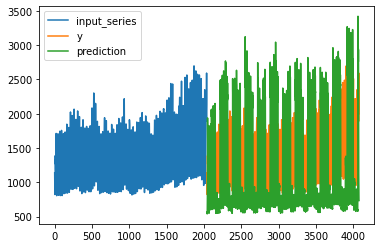

In [163]:
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(2040, 2040+2040), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(2040, 2040+2040), preds, label='prediction')
plt.legend()

# **cluster4**

In [164]:
train_x_array=df2d_to_array3d(cl4)
test_x_array=df2d_to_array3d(cl4)

In [165]:
print(train_x_array.shape)
print(test_x_array.shape)

(7, 2040, 23)
(7, 2040, 23)


In [166]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()

In [167]:
preds=fit.predict(1, 2040)

In [168]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

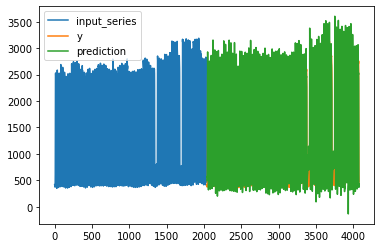

In [169]:
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(2040, 2040+2040), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(2040, 2040+2040), preds, label='prediction')
plt.legend()

# cluster **5**

In [170]:
train_x_array=df2d_to_array3d(cl5)
test_x_array=df2d_to_array3d(cl5)

In [171]:
print(train_x_array.shape)
print(test_x_array.shape)

(6, 2040, 23)
(6, 2040, 23)


In [172]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()

In [173]:
preds=fit.predict(1, 2040)

In [174]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

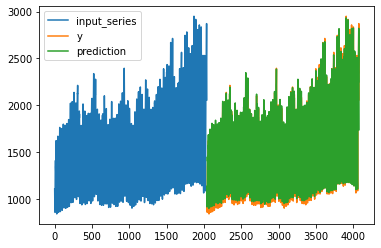

In [175]:
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(2040, 2040+2040), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(2040, 2040+2040), preds, label='prediction')
plt.legend()

In [72]:
valid_pred_array=np.zeros([60, 168])
for idx in range(train_x_array.shape[0]):
    try:
        try:
            x_series=train_x_array[idx, :, 0]
            model=ARIMA(x_series, order=(5, 1, 1))
            fit=model.fit()
            preds=fit.predict(1, 168, typ='levels')
            valid_pred_array[idx, :]=preds
        except:
            print("order 4,1,1")
            
            x_series=train_x_array[idx, :, 0]
            model=ARIMA(x_series, order=(4, 1, 1))
            fit=model.fit()
            preds=fit.predict(1, 168, typ='levels')
            valid_pred_array[idx, :]=preds
    except:
        print(idx, "샘플은 수렴하지 않습니다.")

order 4,1,1
4 샘플은 수렴하지 않습니다.
order 4,1,1
6 샘플은 수렴하지 않습니다.
order 4,1,1
8 샘플은 수렴하지 않습니다.
order 4,1,1
9 샘플은 수렴하지 않습니다.


In [73]:
valid_pred_array.shape

(60, 168)

In [74]:
submission['answer']=valid_pred_array.reshape([-1,1])
submission

,num_date_time,answer
0,1 2020-08-25 00,8179.344604
1,1 2020-08-25 01,8140.920858
2,1 2020-08-25 02,8106.504467
3,1 2020-08-25 03,8048.969498
4,1 2020-08-25 04,8037.006550
...,...,...
10075,60 2020-08-31 19,0.000000
10076,60 2020-08-31 20,0.000000
10077,60 2020-08-31 21,0.000000
10078,60 2020-08-31 22,0.000000


In [75]:
submission.to_csv('baseline_submission2.csv', index=False)